In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import geoplotlib
from geoplotlib.utils import BoundingBox
import os

mpl.rcParams['figure.figsize'] = (10, 10.0)     # set figure size
mpl.rcParams['image.interpolation'] = 'nearest' # set interpolation
mpl.rcParams['font.sans-serif'] = 'SimHei'      # set font
<!-- mpl.rcParams['axes.unicode_minus'] = False -->
<!-- mpl.rcParams['lines.linestyle'] = ':' -->
mpl.rcParams['lines.linewidth'] = 3

In [25]:
sz = 15

mpl.rcParams['figure.figsize'] = [sz, sz]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['legend.fontsize'] = 'large'

In [26]:
stations = pd.read_csv('all_stations.csv', index_col = 0)
stations = stations.astype({'longitude':'float','latitude':'float'})
rainfall = pd.read_csv('collated_daily_data.csv', index_col = 0).astype(float)

In [27]:
#rainfall, stations
# rainfall

In [28]:
# west = [1.286117, 103.535108]
# north = [1.551622, 103.823029]
# east = [1.327377, 104.150277]
# south = [1.151656, 103.839537]

center_long = 103.819836
center_lat = 1.352083

In [29]:
dates = rainfall.index

years = np.zeros(dates.size, dtype = int)
months = np.zeros(dates.size, dtype = int)
days = np.zeros(dates.size, dtype = int)

for i, d in enumerate(dates):
    split = d.split("-")

    years[i] = split[0]
    months[i] = split[1]
    days[i] = split[2]

rainfall['year'] = years
rainfall['month'] = months
rainfall['day'] = days

In [30]:
rainfall

,S77,S109,S117,S55,S64,S90,S61,S114,S11,S50,...,S226,S227,S228,S229,S230,S205,S113.1,year,month,day
2017-03-01,34.0,38.0,10.0,42.8,33.0,25.6,32.6,25.2,15.0,36.8,...,0.0,0.000,0.000,0.000,0.0,0.000,NaN,2017,3,1
2017-03-06,20.8,17.8,4.8,11.2,3.2,8.8,40.4,9.0,4.0,5.4,...,0.0,0.000,0.000,0.000,0.0,0.000,NaN,2017,3,6
2017-03-11,8.6,0.2,0.0,4.0,28.2,1.6,0.0,40.8,59.6,12.8,...,0.0,0.000,0.000,0.000,0.0,0.000,NaN,2017,3,11
2017-03-16,0.0,0.0,1.0,0.0,8.0,0.0,0.0,4.6,3.2,1.2,...,0.0,0.000,0.000,0.000,0.0,0.000,NaN,2017,3,16
2017-03-21,0.0,13.4,0.0,5.6,0.0,3.4,5.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,0.000,NaN,2017,3,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-29,16.6,21.6,0.0,0.0,0.0,14.8,0.0,21.0,0.0,19.4,...,15.0,39.592,6.732,10.556,13.0,8.772,NaN,2022,7,29
2022-08-03,5.2,17.0,0.0,0.0,0.0,18.6,0.0,43.0,0.0,26.4,...,11.4,5.454,24.948,58.464,16.2,11.016,NaN,2022,8,3
2022-08-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,0.000,NaN,2022,8,8
2022-08-13,3.2,17.0,0.0,0.0,0.0,3.4,0.0,15.4,0.0,13.4,...,9.4,6.666,41.778,53.592,4.8,4.080,NaN,2022,8,13


In [31]:
def plot_time(station_id, rainfall, time_frame, save = True, output = './plot'):
    try:
        os.makedirs(output)
    except:
        print('File exists')
    
    time = np.unique(rainfall[time_frame].to_numpy())

    all_cols = rainfall[station_id]
    nmax = all_cols.max()
    nmin = all_cols.min()
    idx = 0
    fig, axs = plt.subplots(1, 1)
    
    for j in time:
        curr_df = rainfall[rainfall[time_frame] == j]
        yearly_fall = curr_df[station_id].to_numpy()
        yearly_indexes = np.arange(idx, idx + yearly_fall.size)
        idx += yearly_fall.size
        axs.plot(yearly_indexes, yearly_fall, label = j);
        axs.plot([yearly_indexes[-1], yearly_indexes[-1]], [nmin, nmax], '--k');
    
    axs.legend()
    axs.set(xlabel = 'Time', ylabel = r'Rainfall $\frac{mm}{day}$', title = station_id);
    output_file = output + '/{0}.png'.format(station_id) 
    # print(output_file)
    fig.savefig(output_file);

In [32]:
%%capture

output = './plot'

try:
    os.makedirs(output)
except:
    print('File exists')
    
times = ['day', 'month', 'year']

# [plot_time(station, rainfall, i, save = True, output = output + '/' + i) for i in times]

for i, station in enumerate(stations['device_id']):
    # [plot_time(station, rainfall, i, save = True, output = output + '/' + i) for i in times]
    plot_time(station, rainfall, 'day', save = True, output = output + '/day')
    plot_time(station, rainfall, 'month', save = True, output = output + '/month')
    plot_time(station, rainfall, 'year', save = True, output = output + '/year')

In [76]:
d = {'name':[], 'lon':[], 'lat':[]}

from math import ceil, floor

copy_stations = stations.copy()
curr_day = rainfall.iloc[0]
copy_stations = copy_stations.drop(['name'], axis = 1)
new_names = ['name', 'lon', 'lat']
copy_stations.columns = new_names

for i in range(copy_stations.shape[0]):
    curr_row = copy_stations.iloc[i]
    station = curr_row['name']
    # print(station)
    
    rain = curr_day[station]
    for j in range(floor(rain) + 1):
        d['lon'].append(curr_row['lon'])
        d['lat'].append(curr_row['lat'])
        d['name'].append(station)
        
repition_rainfall = pd.DataFrame(d)

In [78]:
repition_rainfall['intensity'] = curr_day
repition_rainfall

,name,lon,lat,intensity
0,S77,103.81250,1.29370,NaN
1,S77,103.81250,1.29370,NaN
2,S77,103.81250,1.29370,NaN
3,S77,103.81250,1.29370,NaN
4,S77,103.81250,1.29370,NaN
...,...,...,...,...
342,S227,103.80389,1.43944,NaN
343,S228,103.70073,1.34703,NaN
344,S229,103.72195,1.35167,NaN
345,S230,103.76444,1.30167,NaN


In [73]:
from geoplotlib.utils import BoundingBox

# geoplotlib.hist(test.drop(['name'], axis = 1), colorscale='sqrt', binsize = 8)
geoplotlib.hist(repition_rainfall, colorscale='sqrt', binsize = 8, show_tooltip = True)

SG = BoundingBox(north = 1.470556, west = 103.547526, south = 1.1594868, east = 104.1061449) # coordinates from google maps

geoplotlib.set_bbox(SG)
geoplotlib.show()

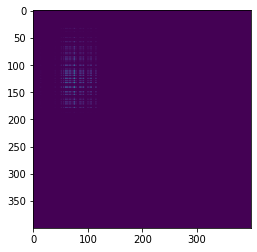

In [67]:
# center = [(north[0] + south[0])/2, (west[1] + east[1])/2]

# # lon = repition_rainfall['lon'].to_numpy() - center[1]
# # lat = repition_rainfall['lat'].to_numpy() - center[0]

# lon = repition_rainfall['lon'].to_numpy() - west[1]
# lat = repition_rainfall['lat'].to_numpy() - south[0]
# sz = 400

# lon *= sz
# lat *= sz

# lon = lon.astype(int)
# lat = lat.astype(int)

# # x, x_ct = np.unique(lon, return_counts = True)
# # y, y_ct = np.unique(lat, return_counts = True)

# heat_map = np.zeros((sz, sz))

# for i, x in enumerate(lon):
#     for j, y in enumerate(lat):
#         heat_map[x, y] += 1


# # heat_map[x, y] += x_ct
# # heat_map[y] += y_ct
# plt.imshow(heat_map)
# plt.show()


# b = lon*sz
# b.astype(int)
# nmax = max(rainfall.max())
# nmin = 0

# plt.hist2d(lon,lat, vmin = nmin, vmax = nmax, cmap = 'viridis', alpha = 0.5)
# plt.show()

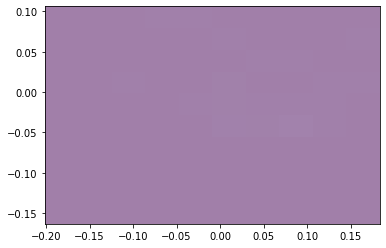

In [ ]:
x = np.random.rayleigh(50, size=5000)
y = np.random.rayleigh(50, size=5000)
test_bin = [np.arange(0,400,5),np.arange(0,300,5)]

center_long = 103.819836
center_lat = 1.352083

x = df_test['lon'].to_numpy() - center_long
y = df_test['lat'].to_numpy() - center_lat
# test_bin = 

nmax = max(rainfall.max())
nmin = 0

plt.hist2d(x,y, vmin = nmin, vmax = nmax, cmap = 'viridis', alpha = 0.5)#, bins = test_bin)

plt.show()
# plt.colorbar()

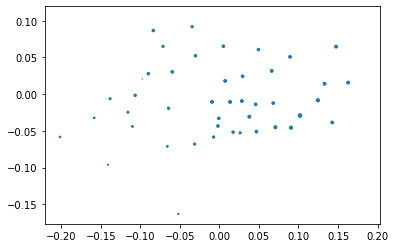

In [8]:
# https://www.geodatos.net/en/coordinates/singapore //decimal simple standard values

center_long = 103.819836
center_lat = 1.352083

y = stations['latitude'].to_numpy() - center_lat
x = stations['longitude'].to_numpy() - center_long
s = rainfall.iloc[0].to_numpy()

plt.scatter(x, y, s = s, alpha = 1)

In [9]:
# https://stackoverflow.com/questions/54168946/adding-text-annotations-to-a-map

In [78]:
sz = np.random.randint(0, 50, size = stations.shape[0])

test = stations.copy()
test = test.drop(['name'], axis = 1)
new_names = ['name', 'lon', 'lat']
test.columns = new_names

curr_day = rainfall.iloc[0]
test['intensity'] = curr_day

# for i in range(0, test.shape[0]):
#     curr_row = test.iloc[i]
#     station = curr_row['name']
#     # print(int(curr_day[station]))
#     geoplotlib.dot(curr_row, color='b', point_size = int(curr_day.iloc[i]) + 1, f_tooltip = lambda r:r['name'])

# geoplotlib.dot(test, color = rgba, point_size = 10, f_tooltip = lambda r:r['name'])
# geoplotlib.dot(test, color='b', point_size = 0,f_tooltip=lambda r:r['name'])
geoplotlib.dot(test, color='b', point_size = 10, f_tooltip=lambda r:r['name'])

## Add to geoplotlib
1. Add in functionality to have different colours on each dot
    1. Use standard matplotlib functionality for colour
2. Add in functionality to change size of point size of each dot
    1. Variable size dots

In [79]:
SG = BoundingBox(north = 1.470556, west = 103.547526, south = 1.1594868, east = 104.4061449)
geoplotlib.set_bbox(SG)
geoplotlib.show()

In [36]:
# https://stackoverflow.com/questions/25408393/getting-individual-colors-from-a-color-map-in-matplotlib

In [54]:
nmax = rainfall.max()
scaled_rainfall = rainfall/nmax

import matplotlib

cmap = matplotlib.cm.get_cmap('Spectral')
rgba = cmap(curr_day)
# rgba

In [75]:
from geoplotlib.utils import BoundingBox
SG = BoundingBox(north = 1.470556, west = 103.547526, south = 1.1594868, east = 104.4061449)
geoplotlib.set_bbox(SG)
geoplotlib.show()

Traceback (most recent call last):
  File "/home/nikhil/.local/lib/python3.8/site-packages/geoplotlib/__init__.py", line 32, in _runapp
    app.start()
  File "/home/nikhil/.local/lib/python3.8/site-packages/geoplotlib/core.py", line 367, in start
    l.invalidate(self.proj)
  File "/home/nikhil/.local/lib/python3.8/site-packages/geoplotlib/layers.py", line 148, in invalidate
    self.painter.points(x, y, 2*self.point_size, False)
  File "/home/nikhil/.local/lib/python3.8/site-packages/geoplotlib/core.py", line 513, in points
    glPointSize(point_size)
ctypes.ArgumentError: argument 1: <class 'TypeError'>: wrong type


In [29]:
from geoplotlib.utils import BoundingBox

# geoplotlib.hist(test.drop(['name'], axis = 1), colorscale='sqrt', binsize = 8)
geoplotlib.hist(test, colorscale='sqrt', binsize = 8)

SG = BoundingBox(north = 1.470556, west = 103.547526, south = 1.1594868, east = 104.4061449) # coordinates from google maps

geoplotlib.set_bbox(SG)
geoplotlib.show()

In [94]:
d = {'name':[], 'lon':[], 'lat':[]}

from math import ceil, floor

for i in range(test.shape[0]):
    curr_row = test.iloc[i]
    station = curr_row['name']
    rain = curr_day[station]
    # print(rain)
    for j in range(floor(rain) + 1):
        d['lon'].append(curr_row['lon'])
        d['lat'].append(curr_row['lat'])
        d['name'].append(station)
df_test = pd.DataFrame(d)

In [95]:
# df_test

,name,lon,lat
0,S77,103.81250,1.29370
1,S77,103.81250,1.29370
2,S77,103.81250,1.29370
3,S77,103.81250,1.29370
4,S77,103.81250,1.29370
...,...,...,...
342,S227,103.80389,1.43944
343,S228,103.70073,1.34703
344,S229,103.72195,1.35167
345,S230,103.76444,1.30167


In [91]:
geoplotlib.hist(df_test, colorscale='sqrt', binsize = 10, show_tooltip = True)
SG = BoundingBox(north = 1.470556, west = 103.547526, south = 1.1594868, east = 104.1) # east = 104.4061449 coordinates from google maps

geoplotlib.set_bbox(SG)
geoplotlib.show()

In [103]:
# import pandas as pd

# # Dataframe containing the data to plot    
# locs = pd.DataFrame({'name': ['a','b'],'lat': [-22.951916, -43.210487], 'lon': [-13.163141, -72.544962]})

# #import geoplotlib.
# import geoplotlib
# # %matplotlib inline

# #function to create a dot density map with annotated tooltip
# geoplotlib.dot(locs, color='b', point_size= 10,f_tooltip=lambda r:r['name'])

# # Display the map.
# geoplotlib.show()

geoplotlib.voronoi(df_test, cmap='Blues_r', max_area=1e6, alpha=255, f_tooltip=lambda d:d['name'])
geoplotlib.set_bbox(SG)
geoplotlib.show()

In [99]:
geoplotlib.delaunay(df_test, cmap='hot_r')
geoplotlib.set_bbox(SG)
geoplotlib.set_smoothing(True)
geoplotlib.show()

nan